# Examples of using MyTools.ipynb

This notebook illustrates some of the function definitions contained in `MyTools.ipynb`.   We start with functions that take a standard graph with vertices `integers`, and then modify the vertex types.  



In [21]:
%run MyTools.ipynb

Make and plot a graph.  The vertices are integers.

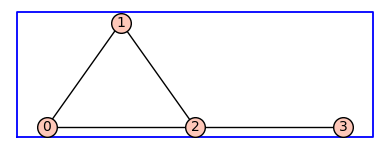

In [22]:
pos = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (4,0)} # vertex positions
G = Graph({0: [1, 2], 1: [2], 2: [3]},pos=pos)

G.show(figsize=4,graph_border=True)

In [23]:
print('vertices:',G.vertices(sort=True))
print('edges:',G.edges(sort=True))

vertices: [0, 1, 2, 3]
edges: [(0, 1, None), (0, 2, None), (1, 2, None), (2, 3, None)]


By default the vertices are `integers` and the edge labels are `None`.   The method `.show()` has a named parameter `edge_lablels` that is set to `False`.  To see the edge labels we repeat the `show()` command again using `edge_labels=True`.


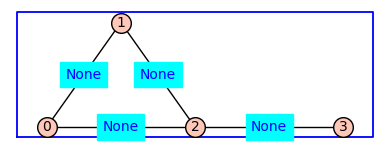

In [24]:
G.show(figsize=4,graph_border=True,edge_labels=True)

The first function we will illustrate is `add_vertex_monomials`.  The `help()` command provides information about the usage.

In [25]:
help(add_vertex_monomials)

Help on function add_vertex_monomials in module __main__:

add_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)
    Add monomials to vertices of a graph.
    
    INPUT:
    
    - ``G`` -- graph object (default: `Graph()`);
    
    - ``method`` -- integer (default: ``integer``);  
    
    OUTPUT: The graph with monomials as vertices
    
    EXAMPLES:
    
    This example illustrates ... ::
    
        sage: A = ModuliSpace()
        sage: A.point(2,3)
        xxx



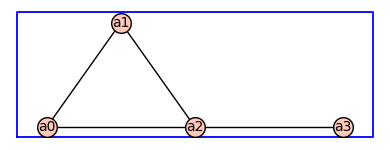

In [26]:
H=add_vertex_monomials(G)
H.show(figsize=4,graph_border=True)

The function `add_edge_monomials()`defines variables from a polynomial ring and applies them edge labels to the graph.  The default method is used below.



In [27]:
G=add_edge_monomials(G)

The function `add_edge_monomials()`also works when vertices are variables from a polynomial ring.



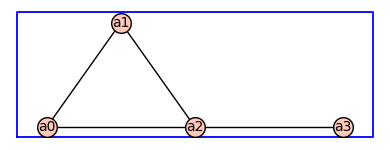

In [28]:
H=add_edge_monomials(H)
H.show(figsize=4,graph_border=True)

Using `method='alpha'` in `add_edge_monomials()` creates simpler edge labels

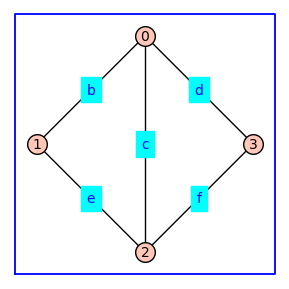

In [39]:
G = graphs.CycleGraph(4); G.add_edge(0,2)
G = add_edge_monomials(G,method='alpha')
G.show(figsize=4,graph_border=True,edge_labels=True)

Using `ring=True` in `add_vertex_monomials()` constructs a polynomial ring over the variables that label the vertices

In [30]:
(G,V) = add_vertex_monomials(graphs.HouseGraph(),ring=True)
show(V)

Multivariate Polynomial Ring in a0, a1, a2, a3, a4 over Integer Ring

In [31]:
from IPython.display import display, Math
display(Math('\\eta \\beta \\alpha \\kappa'))

<IPython.core.display.Math object>

In [32]:
from IPython.display import display, Math
display(Math(latex(V)))

<IPython.core.display.Math object>

In [33]:
V.inject_variables()
fv = (a0+a1)*(a0+a3+a4)^2
print(fv)

Defining a0, a1, a2, a3, a4
a1*a4^2 + a0*a4^2 + 2*a1*a3*a4 + 2*a0*a3*a4 + 2*a0*a1*a4 + 2*a0^2*a4 + a1*a3^2 + a0*a3^2 + 2*a0*a1*a3 + 2*a0^2*a3 + a0^2*a1 + a0^3


## Using `ring=True` in `add_edge_monomials()` constructs a polynomial ring over the variables that label the edges



In [34]:
(G,E) = add_edge_monomials(graphs.HouseGraph(),method='alpha',ring=True)
show(E)

Multivariate Polynomial Ring in b, c, d, e, f, g over Integer Ring

In [35]:
E.inject_variables()
fe = (b+c)*(b+e+f)^2
print(fe)

Defining b, c, d, e, f, g
c*f^2 + b*f^2 + 2*c*e*f + 2*b*e*f + 2*b*c*f + 2*b^2*f + c*e^2 + b*e^2 + 2*b*c*e + 2*b^2*e + b^2*c + b^3


## Below we create a spanning tree labelled according to a breadth\-first traversal



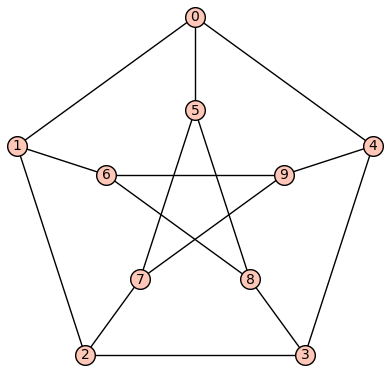

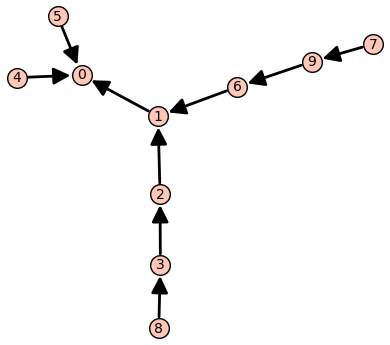

[0, 1, 4, 5, 2, 6, 3, 9, 7, 8]

In [36]:
P = graphs.PetersenGraph()
P.show(edge_labels=False)
(BFSVertexList,BFSTree) = P.lex_BFS(tree=True,initial_vertex=0)
BFSTree.show(edge_labels=False)
show(BFSVertexList)


In [37]:
d = dict((v,i) for i, v in enumerate(BFSVertexList))
print(d)

{0: 0, 1: 1, 4: 2, 5: 3, 2: 4, 6: 5, 3: 6, 9: 7, 7: 8, 8: 9}


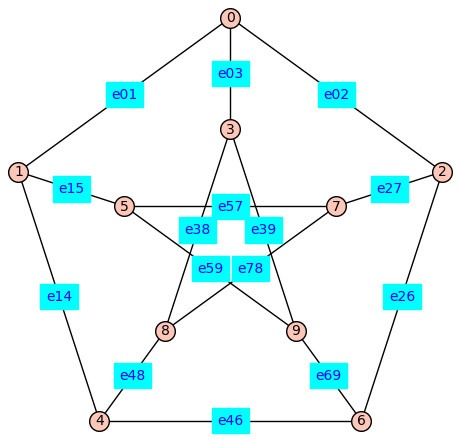

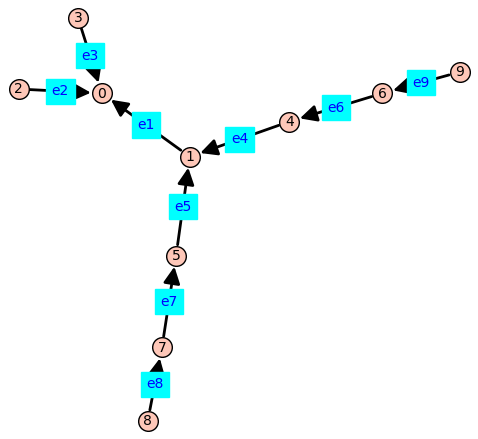

In [38]:
P2 = P.copy()
P2.relabel(d)
P2 = add_edge_monomials(P2)
P2.show(figsize=6,edge_labels=True)

T2=BFSTree.copy()
T2.relabel(d)
T2 = add_edge_monomials(T2,short_name=True)
T2.show(figsize=6,edge_labels=True)